# TABLE OF CONTENTS

[INTRODUCTION](#1)

[CLEANING AND MAKING DATA ACCORDING TO OUR NEEDS](#2)

[EXPLORATORY DATA ANALYSIS](#3)

[PREDICTING APPARENT TEMPERATURE](#4)

 [SUMMARY](#5)

# <a id='1'>INTRODUCTION</a>

In this project of Machine Learning,I am exploring a weather dataset and will predict Apparent Temperature using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#reading weather file and storing that to a variable
path_to_file ="C:/Users/Dell/Desktop/New folder/weather_data.csv"
data_1 = pd.read_csv(path_to_file)
#printing first 5 rows
data_1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
#checking no of entries and data types
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


1. The CSV file includes a hourly/daily summary for the year 2006
2. The data consist of 5999 entries and 12 columns

# <a id='2'>CLEANING AND MAKING DATA ACCORDING TO OUR NEEDS</a>

In [4]:
#converting object into datetime
data_1['Formatted Date'] = pd.to_datetime(data_1['Formatted Date'])

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null datetime64[ns]
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 562.5+ KB


In [6]:
data_1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [7]:
#dropping cols that we dont need
a = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover',]
data_1 = data_1.drop(a,axis=1)
data_1.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,2006-03-31 22:00:00,9.472222,7.388889,0.89,14.1197,1015.13
1,2006-03-31 23:00:00,9.355556,7.227778,0.86,14.2646,1015.63
2,2006-04-01 00:00:00,9.377778,9.377778,0.89,3.9284,1015.94
3,2006-04-01 01:00:00,8.288889,5.944444,0.83,14.1036,1016.41
4,2006-04-01 02:00:00,8.755556,6.977778,0.83,11.0446,1016.51


In [8]:
#indexing according to general date and time
data = data_1.sort_values(by=['Formatted Date'])
data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
2880,2005-12-31 23:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2881,2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2882,2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2883,2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2884,2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 2880 to 2063
Data columns (total 6 columns):
Formatted Date              5999 non-null datetime64[ns]
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Pressure (millibars)        5999 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 328.1 KB


In [10]:
#making an index column
data = data.set_index('Formatted Date')
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [11]:
#removing duplicate values in the index
data.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00', '2006-01-01 00:00:00',
               '2006-01-01 01:00:00', '2006-01-01 02:00:00',
               '2006-01-01 03:00:00', '2006-01-01 04:00:00',
               '2006-01-01 05:00:00', '2006-01-01 06:00:00',
               '2006-01-01 07:00:00', '2006-01-01 08:00:00',
               ...
               '2006-12-31 13:00:00', '2006-12-31 14:00:00',
               '2006-12-31 15:00:00', '2006-12-31 16:00:00',
               '2006-12-31 17:00:00', '2006-12-31 18:00:00',
               '2006-12-31 19:00:00', '2006-12-31 20:00:00',
               '2006-12-31 21:00:00', '2006-12-31 22:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=5999, freq=None)

In [12]:
data

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00,1.205556,-3.072222,0.85,15.9068,1014.08
2006-01-01 05:00:00,2.222222,-2.494444,0.79,20.5597,1013.93
2006-01-01 06:00:00,2.072222,-3.272222,0.81,25.4219,1013.24
2006-01-01 07:00:00,2.200000,-2.850000,0.80,23.1679,1013.19


In [13]:
#removing any null values
data.dropna()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00,1.205556,-3.072222,0.85,15.9068,1014.08
2006-01-01 05:00:00,2.222222,-2.494444,0.79,20.5597,1013.93
2006-01-01 06:00:00,2.072222,-3.272222,0.81,25.4219,1013.24
2006-01-01 07:00:00,2.200000,-2.850000,0.80,23.1679,1013.19


# <a id='3'>EXPLORATORY DATA ANALYSIS</a>

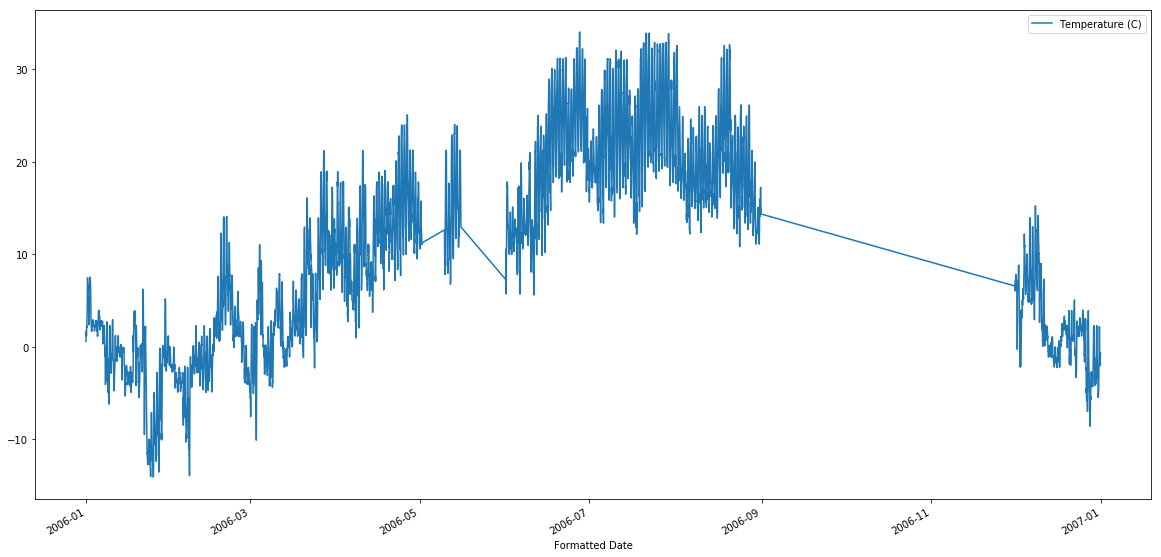

In [14]:
#plotting the data
data.plot(x=data.index,y="Temperature (C)",figsize=(20,10))

## we cannot find any trend from this graph so we have to resample our data

In [15]:
#resampling the data into day format
data_2 = data.resample(rule='D').mean()
data_2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,981.770833


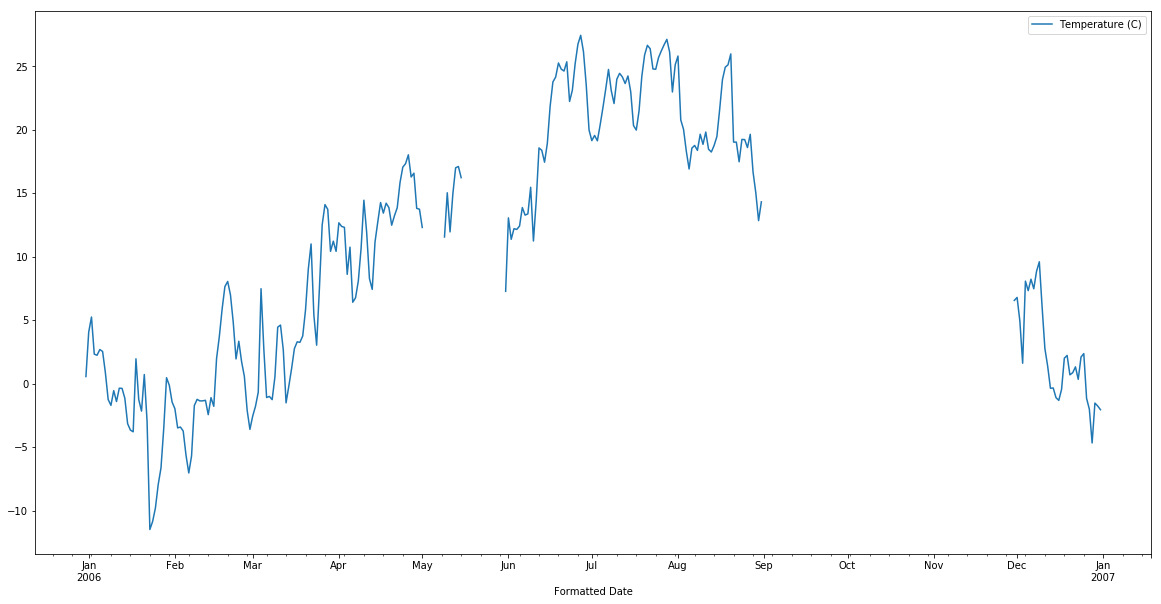

In [16]:
data_2.plot(x=data_2.index,y="Temperature (C)",figsize=(20,10))

## Now we can see the trends more clearly over the year, The blank space in the above            graph shows we dont have data for the particular month.
## We dont have data for some days in APRIL , MAY.
## We dont have data from the month of SEP TO DEC

In [17]:
#extracting data from the month of January
jan = data['2006-01-01':'2006-01-31']
jan

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00,1.205556,-3.072222,0.85,15.9068,1014.08
2006-01-01 05:00:00,2.222222,-2.494444,0.79,20.5597,1013.93
2006-01-01 06:00:00,2.072222,-3.272222,0.81,25.4219,1013.24
2006-01-01 07:00:00,2.200000,-2.850000,0.80,23.1679,1013.19
2006-01-01 08:00:00,2.733333,-2.133333,0.82,22.8781,1013.29


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


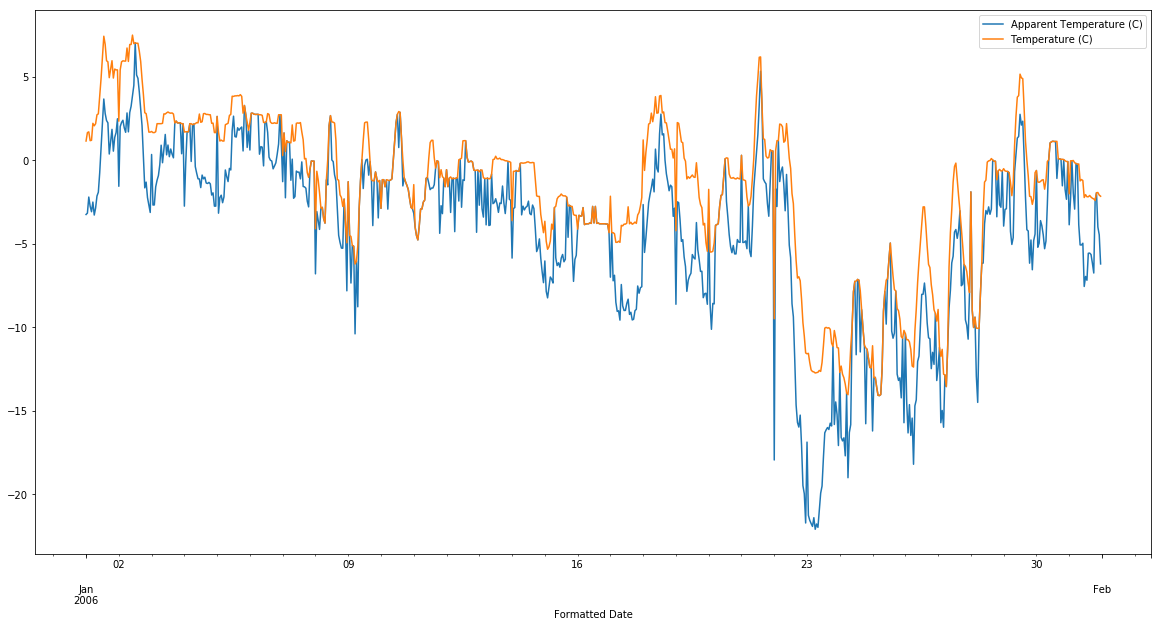

In [18]:
jan.plot(y=['Apparent Temperature (C)','Temperature (C)'],x=jan.index,kind='line',figsize=(20,10))

## We cannot see the trend clearly in above graph 
## So we are resampling the data for the month of January

In [19]:
#resampling
JAN = jan.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05,2.703935,0.445833,0.951250,8.991179,935.873750


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


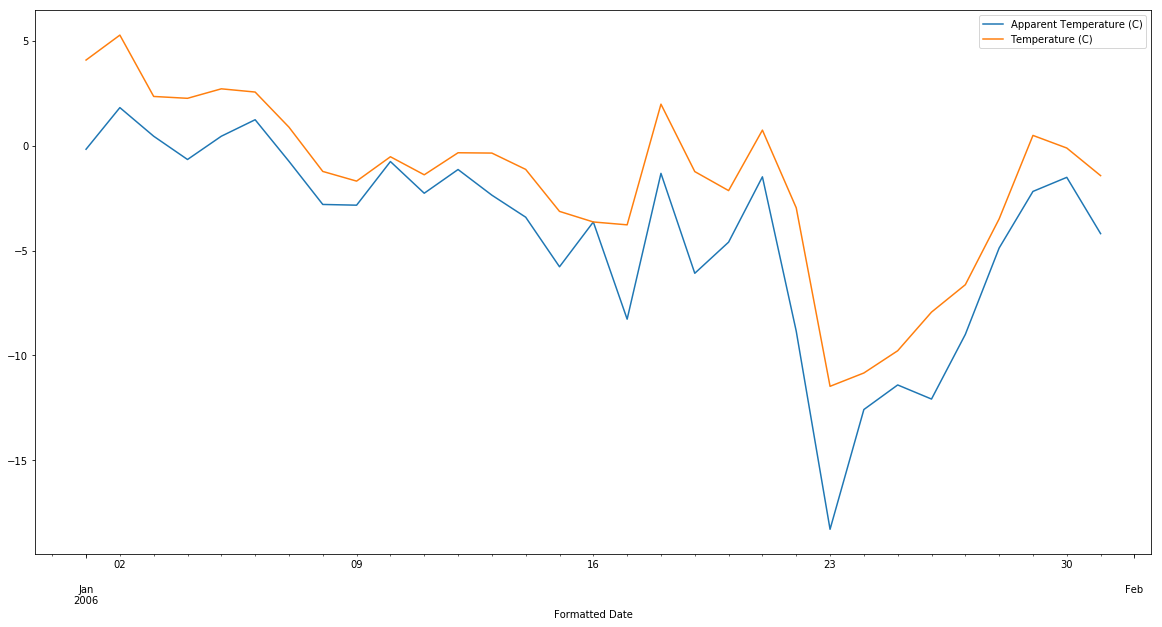

In [20]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],x=JAN.index,kind='line',figsize=(20,10))

## The trend is more clear now and we can see the difference between apparent temperature and temperature according to dates in January 

In [21]:
winter = data_2['2006-01-01':'2006-02-28']
spring = data_2['2006-03-01':'2006-05-31']
summer = data_2['2006-06-01':'2006-08-31']

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


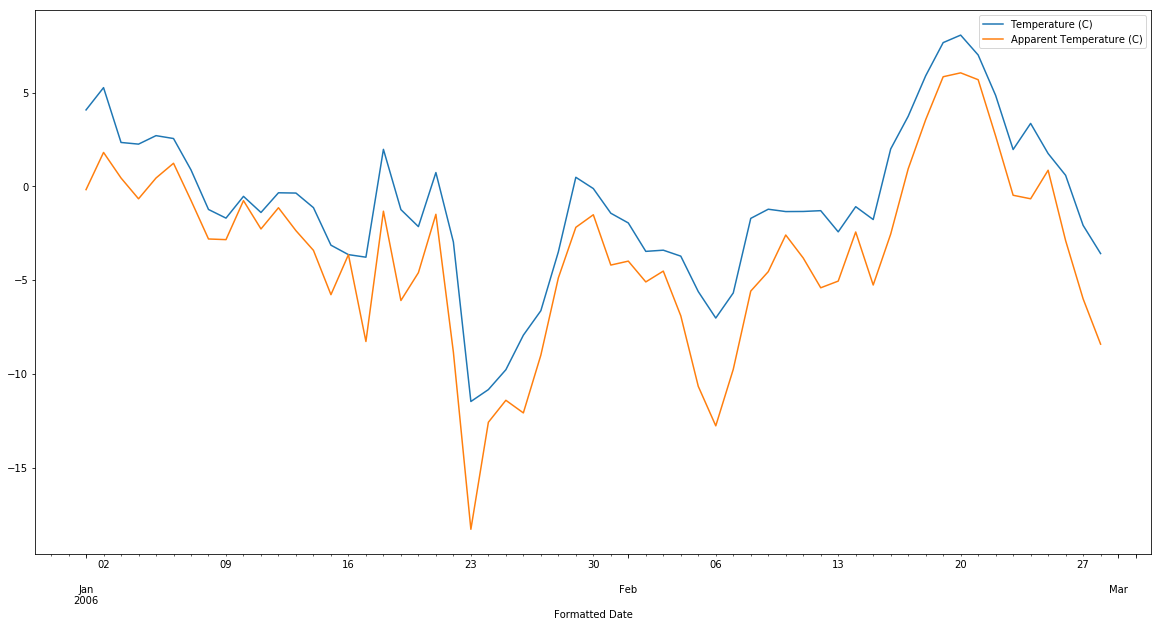

In [22]:
winter.plot(winter.index,y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## Now we can see and estimate the temperature and apparent temperature according to          the dates.

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


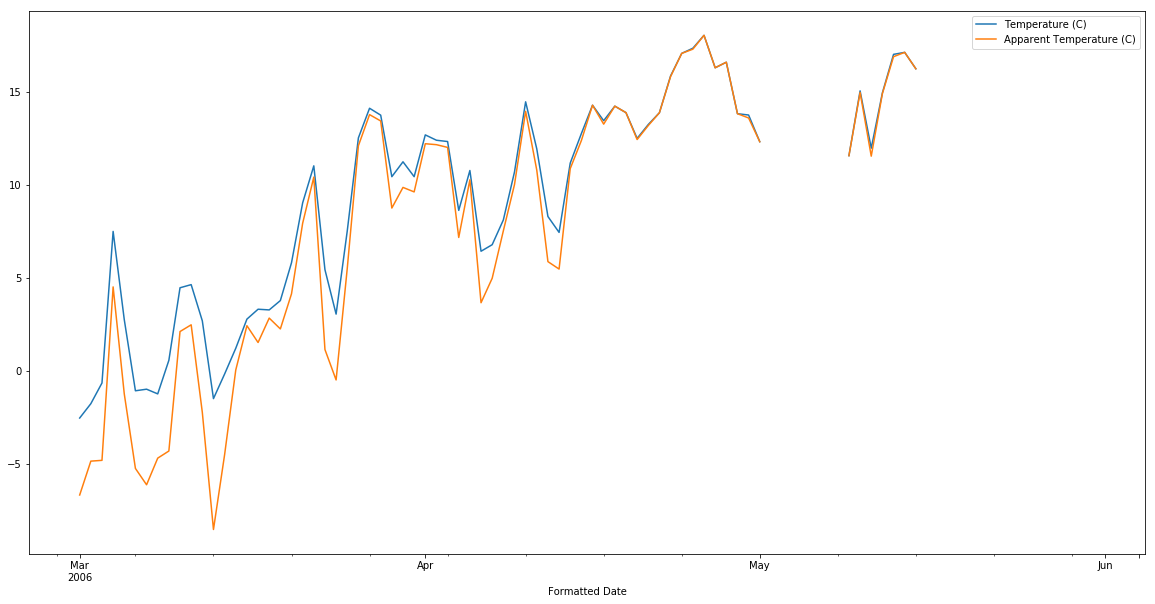

In [23]:
spring.plot(spring.index,y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


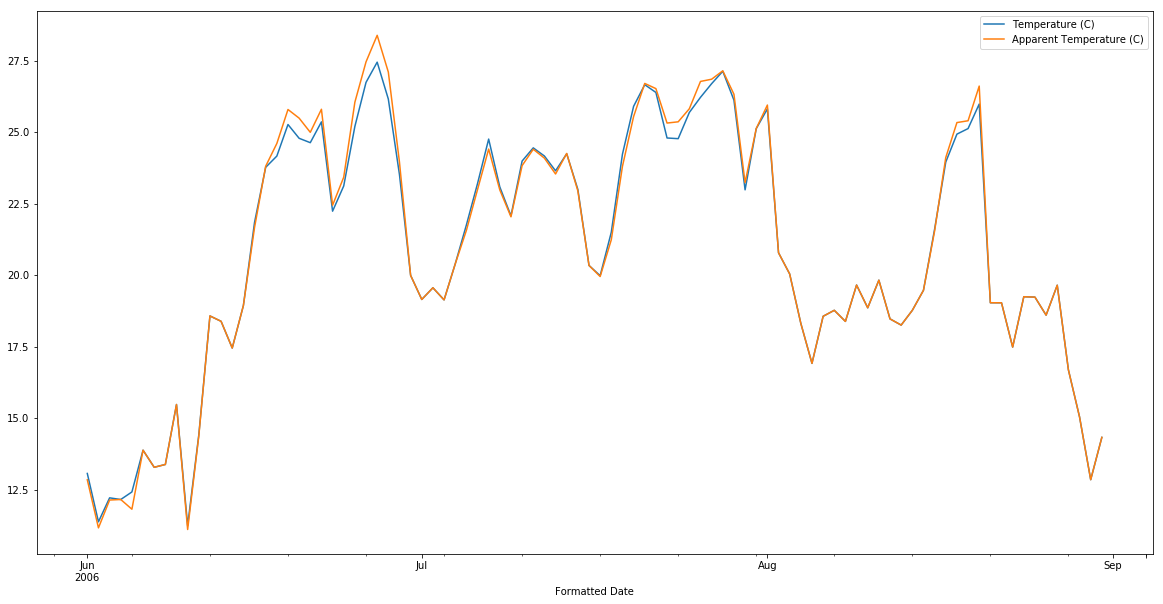

In [53]:
summer.plot(x=summer.index,y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## Finding the coorelation between the data

In [25]:
#checking correlation between the cols
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


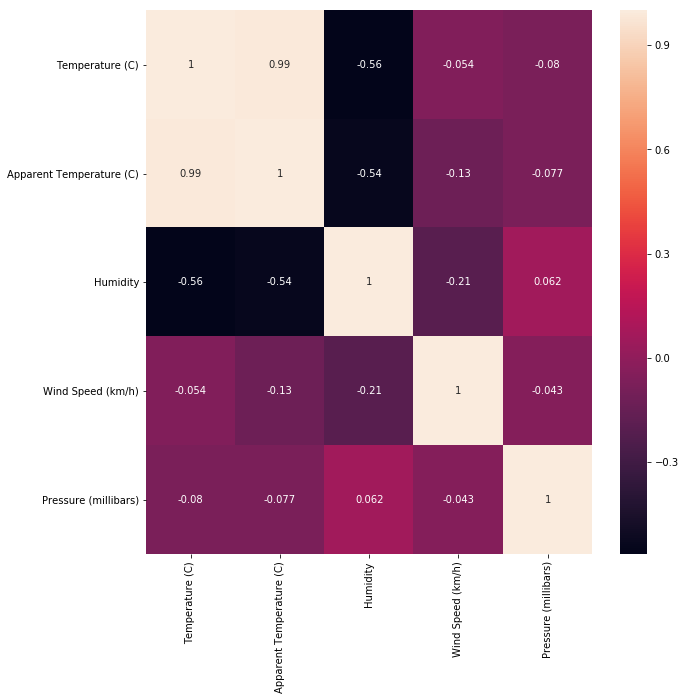

In [26]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Visualizing the data

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


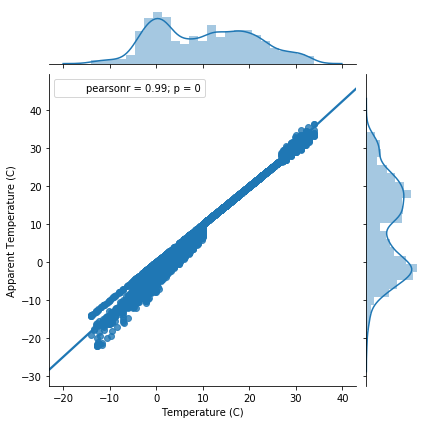

In [27]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


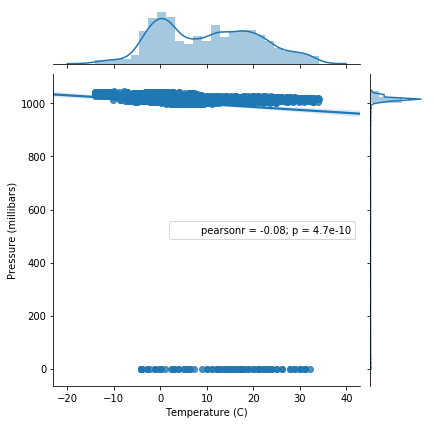

In [28]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


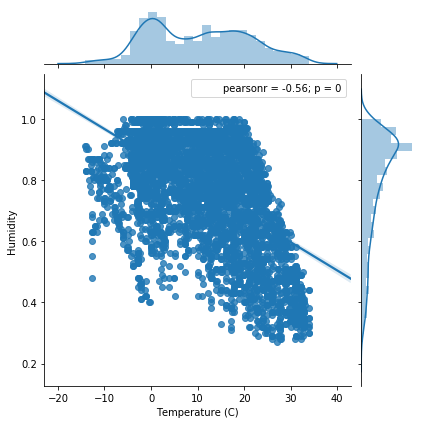

In [29]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


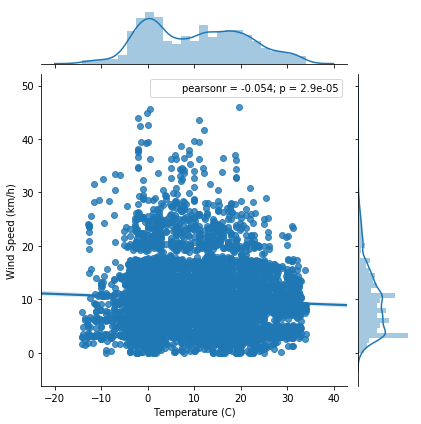

In [30]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


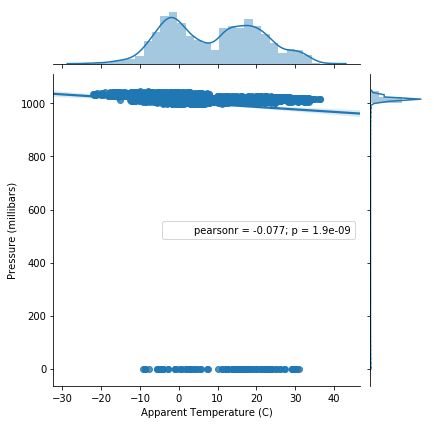

In [31]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


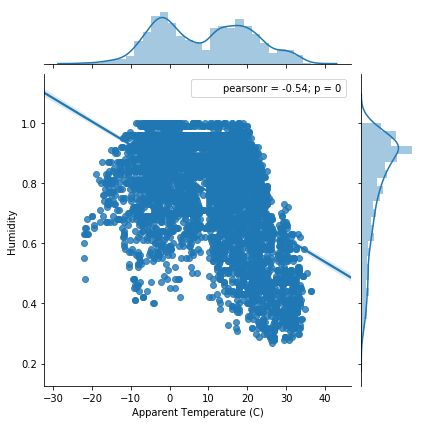

In [32]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


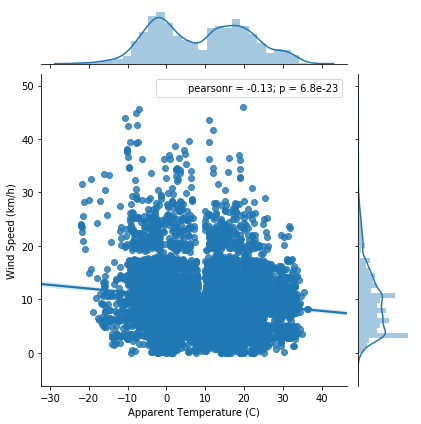

In [33]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


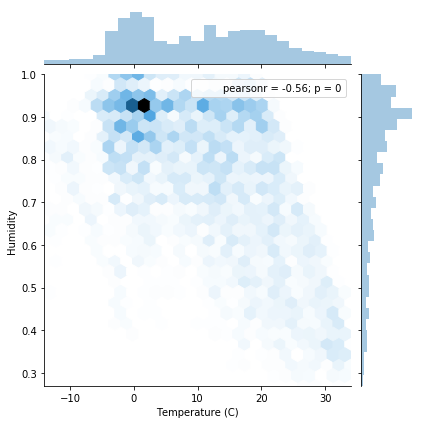

In [34]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


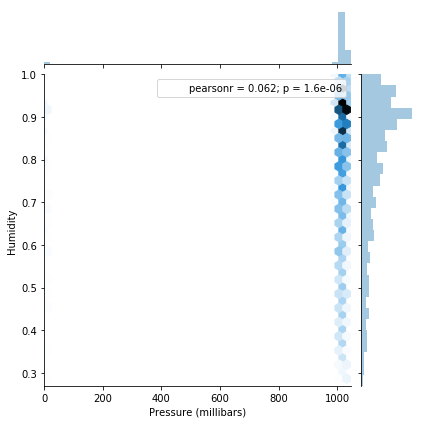

In [35]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


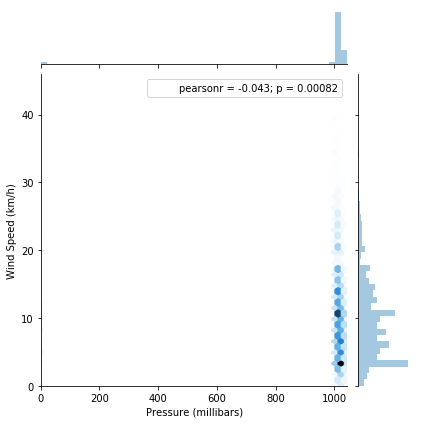

In [50]:
sns.jointplot(kind='hex',y=data['Wind Speed (km/h)'],x=data['Pressure (millibars)'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


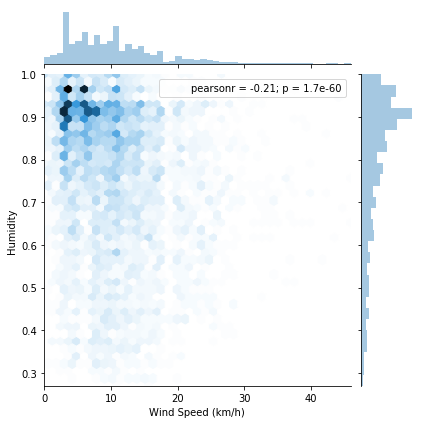

In [51]:
sns.jointplot(kind='hex',x=data['Wind Speed (km/h)'],y=data['Humidity'])

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


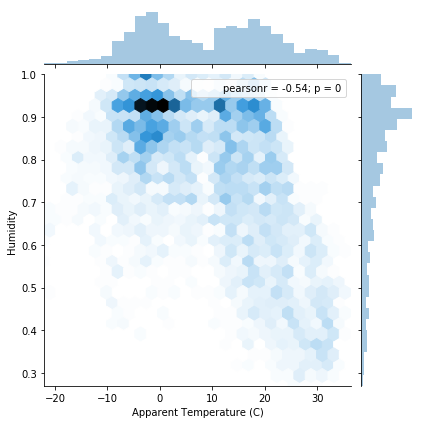

In [52]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 1440x1440 with 0 Axes>

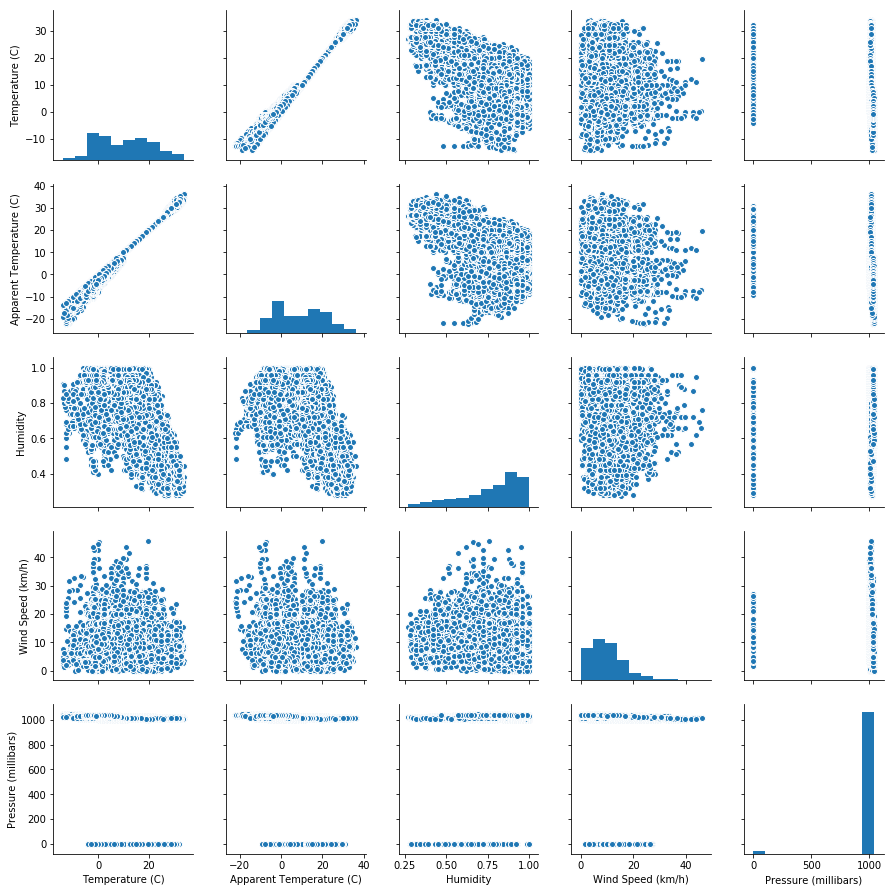

In [37]:
plt.figure(figsize  =(20,20))
sns.pairplot(data)
plt.show()

# <a id='4'>PREDICTING APPARENT TEMPERATURE</a>

# We are splitting the data into 70-30 % that means 70% of the data is going in training the model and the 30% of the data is going in testing and will predict the Apparent Temperature 

In [38]:
#taking 70% of the data for training
X = data['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00,1.205556,-3.072222,0.85,15.9068,1014.08
2006-01-01 05:00:00,2.222222,-2.494444,0.79,20.5597,1013.93
2006-01-01 06:00:00,2.072222,-3.272222,0.81,25.4219,1013.24
2006-01-01 07:00:00,2.200000,-2.850000,0.80,23.1679,1013.19
2006-01-01 08:00:00,2.733333,-2.133333,0.82,22.8781,1013.29


In [39]:
#30% of data for testing
X1 = data['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00,16.766667,16.766667,0.93,3.2200,1020.82
2006-07-21 05:00:00,22.633333,22.633333,0.79,1.6100,1020.82
2006-07-21 06:00:00,24.988889,24.988889,0.68,2.9463,1020.94
2006-07-21 07:00:00,27.805556,29.033333,0.59,2.8980,1020.97
2006-07-21 08:00:00,30.116667,30.861111,0.48,3.1395,1020.77


In [40]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00 to 2006-07-20 23:00:00
Data columns (total 4 columns):
Temperature (C)         4248 non-null float64
Humidity                4248 non-null float64
Wind Speed (km/h)       4248 non-null float64
Pressure (millibars)    4248 non-null float64
dtypes: float64(4)
memory usage: 165.9 KB


In [41]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00    -3.238889
2006-01-01 01:00:00    -3.155556
2006-01-01 02:00:00    -2.194444
2006-01-01 03:00:00    -2.744444
2006-01-01 04:00:00    -3.072222
2006-01-01 05:00:00    -2.494444
2006-01-01 06:00:00    -3.272222
2006-01-01 07:00:00    -2.850000
2006-01-01 08:00:00    -2.133333
2006-01-01 09:00:00    -1.905556
2006-01-01 10:00:00    -0.738889
2006-01-01 11:00:00     0.805556
2006-01-01 12:00:00     2.238889
2006-01-01 13:00:00     3.677778
2006-01-01 14:00:00     2.811111
2006-01-01 15:00:00     2.388889
2006-01-01 16:00:00     2.250000
2006-01-01 17:00:00     0.383333
2006-01-01 18:00:00     1.100000
2006-01-01 19:00:00     1.861111
2006-01-01 20:00:00     0.555556
2006-01-01 21:00:00     1.377778
2006-01-01 22:00:00     1.666667
2006-01-01 23:00:00     2.494444
2006-01-02 00:00:00    -1.550000
2006-01-02 01:00:00     2.022222
2006-01-02 02:00:00     2.277778
2006-01-02 03:00:00     2.405556
2006-01-02 04:00:00     1.944444
2006-01-02 05:00:00     1.68

## Training the model 

In [42]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00,16.766667,0.93,3.2200,1020.82
2006-07-21 05:00:00,22.633333,0.79,1.6100,1020.82
2006-07-21 06:00:00,24.988889,0.68,2.9463,1020.94
2006-07-21 07:00:00,27.805556,0.59,2.8980,1020.97
2006-07-21 08:00:00,30.116667,0.48,3.1395,1020.77


In [44]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00    21.277778
2006-07-21 01:00:00    17.733333
2006-07-21 02:00:00    17.711111
2006-07-21 03:00:00    17.472222
2006-07-21 04:00:00    16.766667
2006-07-21 05:00:00    22.633333
2006-07-21 06:00:00    24.988889
2006-07-21 07:00:00    29.033333
2006-07-21 08:00:00    30.861111
2006-07-21 09:00:00    31.677778
2006-07-21 10:00:00    32.338889
2006-07-21 11:00:00    33.161111
2006-07-21 12:00:00    32.811111
2006-07-21 13:00:00    33.411111
2006-07-21 14:00:00    33.488889
2006-07-21 15:00:00    32.250000
2006-07-21 16:00:00    32.850000
2006-07-21 17:00:00    31.944444
2006-07-21 18:00:00    29.416667
2006-07-21 19:00:00    26.138889
2006-07-21 20:00:00    24.305556
2006-07-21 21:00:00    23.933333
2006-07-21 22:00:00    22.666667
2006-07-21 23:00:00    22.083333
2006-07-22 00:00:00    20.883333
2006-07-22 01:00:00    20.444444
2006-07-22 02:00:00    19.933333
2006-07-22 03:00:00    20.466667
2006-07-22 04:00:00    19.400000
2006-07-22 05:00:00    22.67

In [45]:
#predicting the Apparent Temperature
y_pred = regr.predict(X_test)

In [46]:
regr.score(X_test,Y_test)

0.9923934744917491

## Showing the Actual Apparent Temperature and the predicted Apparent Temperature 

In [47]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00,21.277778,22.563679
2006-07-21 01:00:00,17.733333,18.561591
2006-07-21 02:00:00,17.711111,18.096287
2006-07-21 03:00:00,17.472222,18.410439
2006-07-21 04:00:00,16.766667,17.459674
2006-07-21 05:00:00,22.633333,24.210395
2006-07-21 06:00:00,24.988889,26.607201
2006-07-21 07:00:00,29.033333,29.731491
2006-07-21 08:00:00,30.861111,32.230735


## Calculating the error in prediction 

In [49]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.8110788905226693
Mean Squared Error:  1.0493637098684605
Root Mean Squared Error:  1.0243845517521535


# <a id='5'>SUMMARY</a>

#  In This Project i have analyzed the given dataset and done the following:

#  1. Performed data cleaning using pandas library. Which includes replacing         the miscoded information and handling missing data.

#  2. Made a Exploratory Data Analysis on the data using pandas.

#  3. Visualize distributions and correlation of features using seaborn and               pandas

#  4. Built a linear regression model taking the selected features through                 feature engineering

#  5. Predicted the apparent temp for the split test data(30% of the data for             test) 
